In [1]:
import qiskit
%matplotlib inline
qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.0',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.2'}

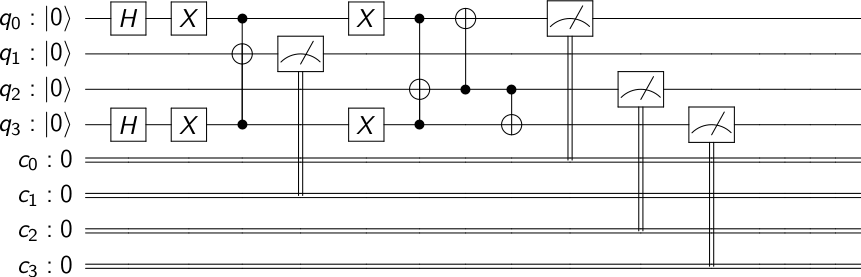

In [2]:
len = 4
q_r = qiskit.QuantumRegister(len, 'q')
c_r = qiskit.ClassicalRegister(len, 'c')
q_c = qiskit.QuantumCircuit(q_r, c_r)

q_c.h([q_r[0],q_r[3]])
q_c.x([q_r[0],q_r[3]])
q_c.ccx(q_r[0],q_r[3],q_r[1])
q_c.x([q_r[0],q_r[3]])
q_c.ccx(q_r[0],q_r[3],q_r[2])
q_c.cx(q_r[2],q_r[0])
q_c.cx(q_r[2],q_r[3])


#q_c.barrier()
q_c.measure(q_r,c_r)
q_c.draw(output='latex', line_length=300, scale=0.5)   




{'0001': 247, '0100': 246, '1000': 235, '0010': 272}


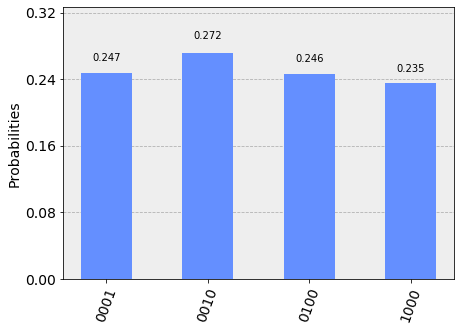

In [3]:
sim = qiskit.BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(q_c, backend = sim, shots = 1000)
res = job.result().get_counts()
print(res)
qiskit.visualization.plot_histogram(res)

In [4]:
print(q_c.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
creg c[4];
h q[0];
h q[3];
x q[0];
x q[3];
ccx q[0],q[3],q[1];
x q[0];
x q[3];
ccx q[0],q[3],q[2];
cx q[2],q[0];
cx q[2],q[3];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];

